In [1]:
# matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [2]:
import matplotlib

In [3]:
datadir = '/home/tamarnat/code/SPEC2006/'
plotdir = datadir + 'plots/'
# datadir = '/run/user/1000/gvfs/sftp:host=amarillo.cs.ucdavis.edu/home/tamarnat/VRG-experiments/results/microbench/'

In [4]:
# SPEC2006 Benchmarks
all_spec_benchmarks = ['401.bzip2', '403.gcc', '410.bwaves', '416.gamess', '429.mcf', '433.milc', '434.zeusmp', 
                       '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk','453.povray', 
                       '454.calculix', '456.hmmer', '458.sjeng', '459.GemsFDTD','462.libquantum', '464.h264ref',
                       '465.tonto', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '998.specrand',
                       '999.specrand']

spec_benchmarks = ['spec_benchmarks/'+ bm for bm in all_spec_benchmarks]
spec_benchmarks_names = ['445.gobmk','453.povray', '454.calculix', '456.hmmer', '458.sjeng', '459.GemsFDTD','462.libquantum']

In [5]:
cpus = ['kvm', 'atomic', 'timing', 'o3']
datasize = ['test', 'ref']

In [6]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [7]:
# data frame for KVM CPU
rows = []
for size in datasize:
    cdir = datadir + 'results/' + cpus[0] + '/' + size + '/'
    kvm_benchmarks = os.listdir(cdir)
    kvm_benchmarks.sort()
    for bm in kvm_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds')])

df_kvm = pd.DataFrame(rows, columns=['data_size', 'benchmark','cycles', 'instructions', 'ops', 'sim_time', 'host_seconds'])
df_kvm['host_mins'] = df_kvm['host_seconds']/60
df_kvm['host_hours'] = df_kvm['host_seconds']/3600
df_kvm['insts_per_billion'] = df_kvm['instructions']/1000000000
df_kvm['ipc'] = df_kvm['instructions']/df_kvm['cycles']
df_kvm['cpi'] = df_kvm['cycles']/df_kvm['instructions']
df_kvm['opc'] = df_kvm['ops']/df_kvm['cycles']

In [8]:
# data frame for Atomic CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + 'results/' + cpus[1] + '/' + size + '/'
    atomic_benchmarks = os.listdir(cdir)
    atomic_benchmarks.sort()
    for bm in atomic_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds')])

df_atomic = pd.DataFrame(rows, columns=['data_size','benchmark','cycles', 'instructions', 'ops', 'sim_time', 'host_seconds'])
df_atomic['host_mins'] = df_atomic['host_seconds']/60
df_atomic['host_hours'] = df_atomic['host_seconds']/3600
df_atomic['insts_per_billion'] = df_atomic['instructions']/1000000000
df_atomic['ipc'] = df_atomic['instructions']/df_atomic['cycles']
df_atomic['cpi'] = df_atomic['cycles']/df_atomic['instructions']
df_atomic['opc'] = df_atomic['ops']/df_atomic['cycles']

In [9]:
# data frame for Timing CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + '/results/' + cpus[2] + '/' + size + '/'
    timing_benchmarks = os.listdir(cdir)
    timing_benchmarks.sort()
    for bm in timing_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.numCycles'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.committedInsts')])

df_timing = pd.DataFrame(rows, columns=['data_size','benchmark','total_cycles', 'total_instructions', 'ops',
                                        'sim_time','host_seconds', 'cycles', 'instructions'])
df_timing['host_mins'] = df_timing['host_seconds']/60
df_timing['host_hours'] = df_timing['host_seconds']/3600
df_timing['insts_per_billion'] = df_timing['instructions']/1000000000
df_timing['cpi'] = df_timing['cycles']/df_timing['instructions']

In [10]:
# data frame for O3 CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + '/results/' + cpus[3] + '/' + size + '/'
    o3_benchmarks = os.listdir(cdir)
    o3_benchmarks.sort()
    for bm in o3_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.cpi'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.commit.committedInsts')])

df_o3 = pd.DataFrame(rows, columns=['data_size', 'benchmark','cycles', 'total_instructions', 'ops', 'sim_time', 
                                    'host_seconds', 'cpi', 'instructions'])
df_o3['host_mins'] = df_o3['host_seconds']/60
df_o3['host_hours'] = df_o3['host_seconds']/3600
df_o3['insts_per_billion'] = df_o3['instructions']/1000000000

In [11]:
def plot_bar(data_size, cpu, benchmarks, stat, norm=True):
    frame_select = {'kvm': df_kvm, 'atomic': df_atomic, 'timing': df_timing, 'o3': df_o3}
    data_frame = frame_select[cpu]
    plt.figure()
    i = 0
    sizes = [data_size]
    for size in sizes:
        for bench in benchmarks:
            if norm: 
                base = data_frame[(data_frame['data_size']==size)][stat].iloc[0]
            else: base = 1
            a = data_frame[(data_frame['benchmark']==bench) & (data_frame['data_size']==size)]
            plt.bar(i, a[stat].iloc[0]/base, color='grey')
            i += 1

    plt.xticks(np.arange(len(benchmarks)+1), benchmarks, rotation=40, ha='right')

In [12]:
def sublplot_bar(cpus, benchmarks, stat, ax1_title, ax2_title, ax1_ylabel, ax2_ylabel):
    # Create Figure and Subplots
    figure, (ax1, ax2) = plt.subplots(1,2, sharey=False, dpi=120)

    # Plot
    i = 0
    for cpu in cpus:
        for j, bench in enumerate(kvm_benchmarks):
            a = df1[(df1['benchmark']==bench) & (df1['cpu']==cpu)]
            b = df2[(df2['benchmark']==bench) & (df2['cpu']==cpu)]
            ax1.bar(i, a[stat].iloc[0], color= 'gray')
            ax2.bar(i, b[stat].iloc[0], color= 'gray')
            i += 1
            
    # Title, X and Y labels  
    x = np.arange(len(kvm_benchmarks)+1)
    ax1.set_xticks(x);ax2.set_xticks(x)
    ax1.set_xticklabels(kvm_benchmarks, rotation=40, ha='right');ax2.set_xticklabels(kvm_benchmarks, rotation=40, ha='right')
    ax1.set_ylabel(ax1_ylabel);ax2.set_ylabel(ax2_ylabel)
    ax1.set_title(ax1_title);ax2.set_title(ax2_title);

## KVM

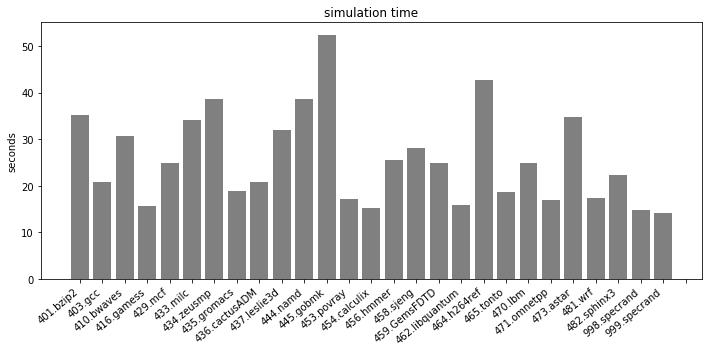

In [24]:
data_size = 'test'
stat = 'sim_time'
plot_title = 'simulation time'
ylabel = 'seconds'
cpu = 'kvm'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

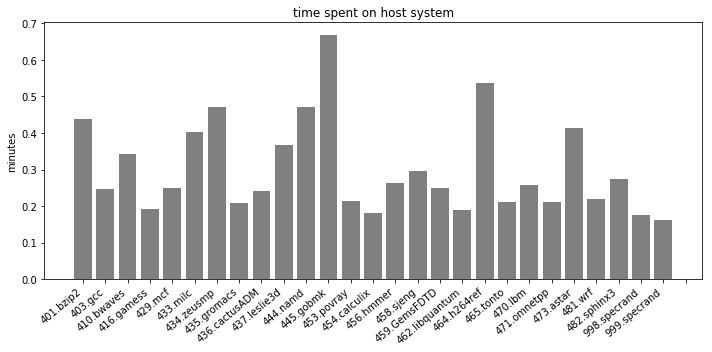

In [14]:
data_size = 'test'
stat = 'host_mins'
plot_title = 'time spent on host system'
ylabel = 'minutes'
cpu = 'kvm'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

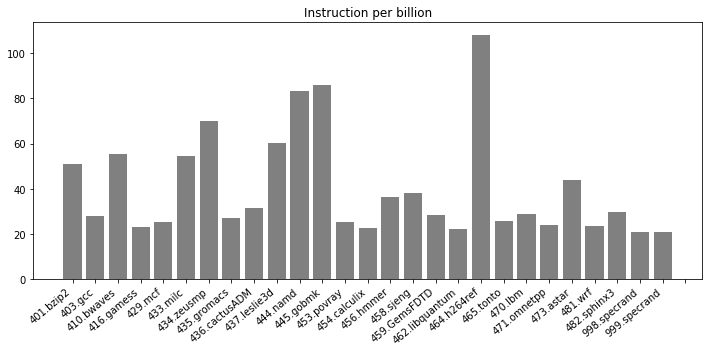

In [15]:
data_size = 'test'
stat = 'insts_per_billion'
plot_title = 'Instruction per billion'
ylabel = ''
cpu = 'kvm'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

## Atomic

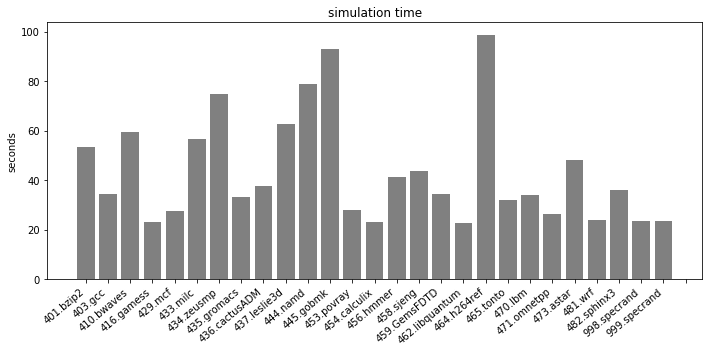

In [16]:
data_size = 'test'
stat = 'sim_time'
plot_title = 'simulation time'
ylabel = 'seconds'
cpu = 'atomic'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5 
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

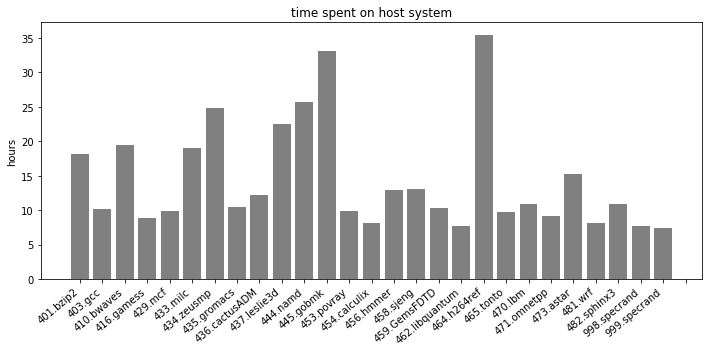

In [17]:
data_size = 'test'
stat = 'host_hours'
plot_title = 'time spent on host system'
ylabel = 'hours'
cpu = 'atomic'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

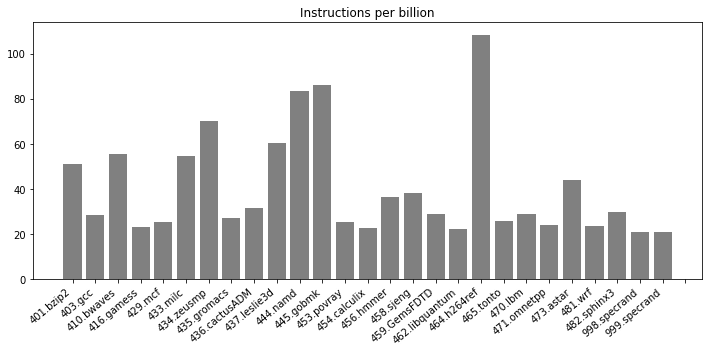

In [18]:
data_size = 'test'
stat = 'insts_per_billion'
plot_title = 'Instructions per billion'
ylabel = ''
cpu = 'atomic'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

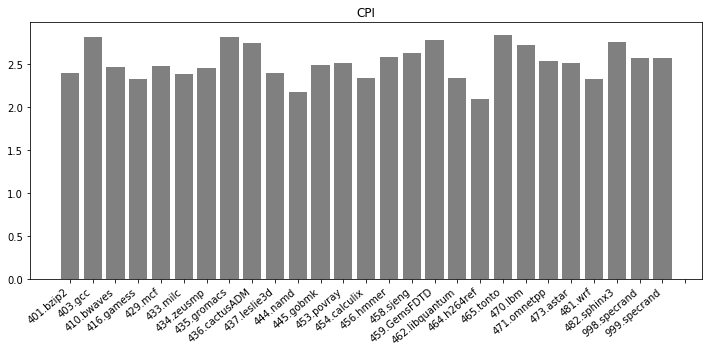

In [19]:
data_size = 'test'
stat = 'cpi'
plot_title = 'CPI'
ylabel = ''
cpu = 'atomic'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

## Timing

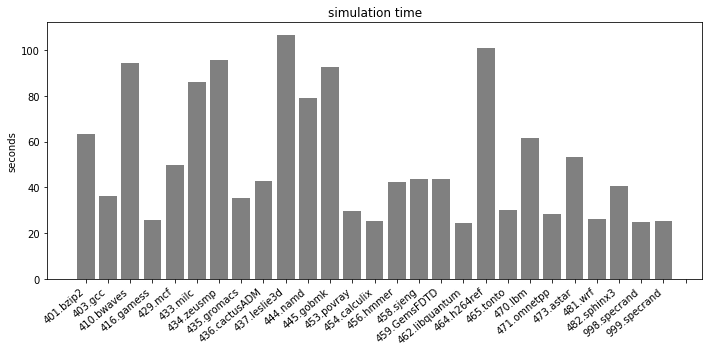

In [20]:
data_size = 'test'
stat = 'sim_time'
plot_title = 'simulation time'
ylabel = 'seconds'
cpu = 'timing'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

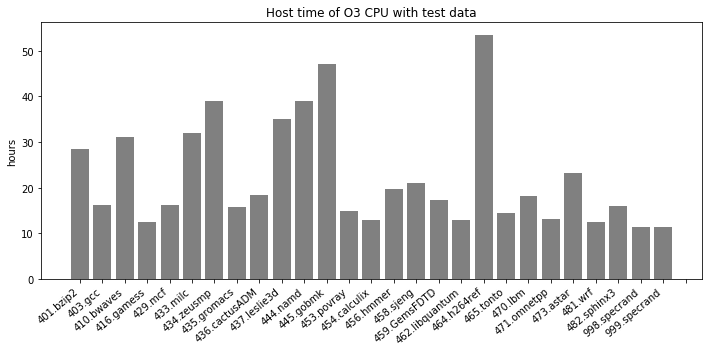

In [21]:
data_size = 'test'
stat = 'host_hours'
plot_title = 'Host time of O3 CPU with test data'
ylabel = 'hours'
cpu = 'timing'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

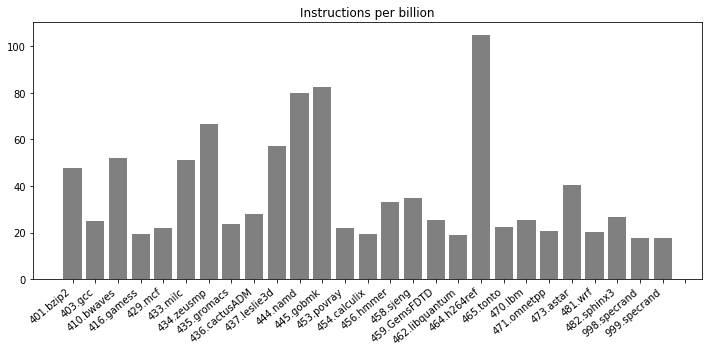

In [22]:
data_size = 'test'
stat = 'insts_per_billion'
plot_title = 'Instructions per billion'
ylabel = ''
cpu = 'timing'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

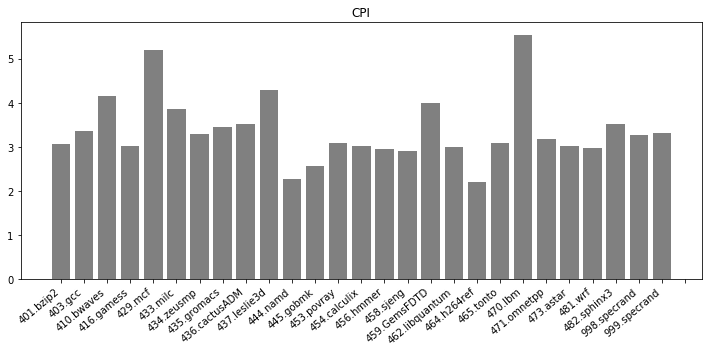

In [25]:
data_size = 'test'
stat = 'cpi'
plot_title = 'CPI'
ylabel = ''
cpu = 'timing'
# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

## O3

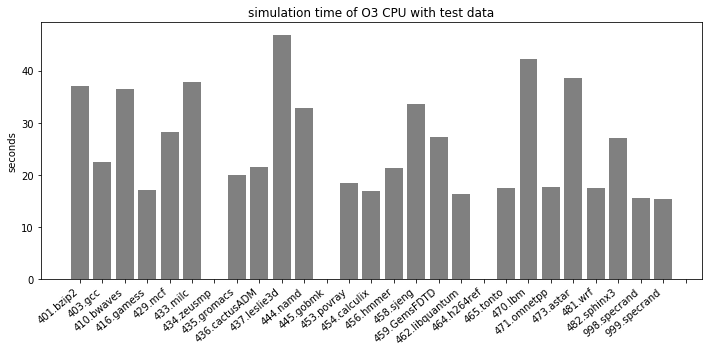

In [26]:
data_size = 'test'
stat = 'sim_time'
plot_title = 'simulation time of O3 CPU with test data'
ylabel = 'seconds'
cpu = 'o3'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

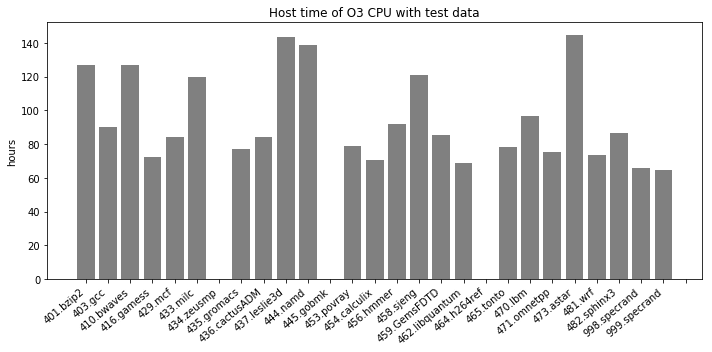

In [27]:
data_size = 'test'
stat = 'host_hours'
plot_title = 'Host time of O3 CPU with test data'
ylabel = 'hours'
cpu = 'o3'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

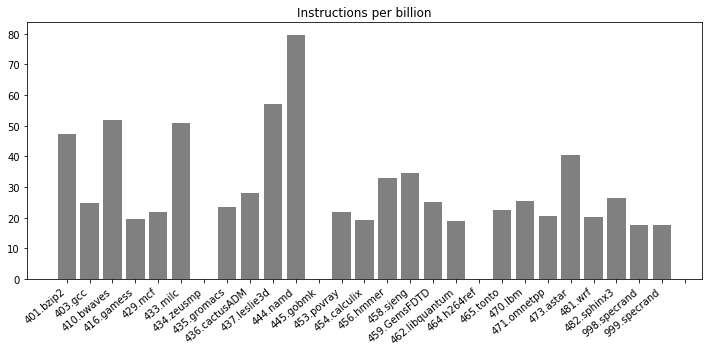

In [28]:
data_size = 'test'
stat = 'insts_per_billion'
plot_title = 'Instructions per billion'
ylabel = ''
cpu = 'o3'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)

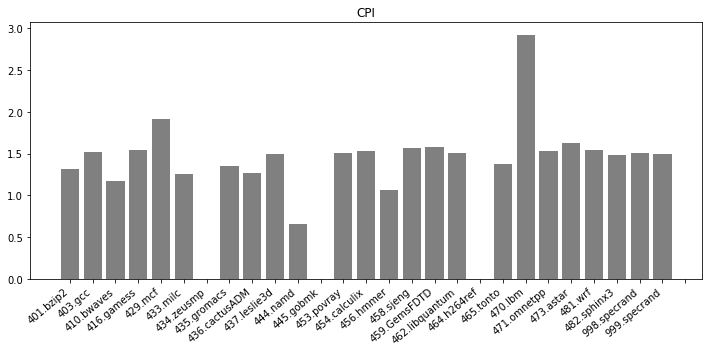

In [29]:
data_size = 'test'
stat = 'cpi'
plot_title = 'CPI'
ylabel = ''
cpu = 'o3'

# plot function
plot_bar(data_size, cpu, atomic_benchmarks, stat, norm=False)

# plot parameters
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

plt.ylabel(ylabel)
plt.title(plot_title)

# plot directory
newplot =  plotdir + cpu + '/' + data_size + '/' 
# plt.legend(loc=1, prop={'size': 8})

plt.tight_layout()
plt.savefig(newplot + stat + '.png', format='png', dpi=600)